In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pickle
def acquire(x):
    dicts = {}
    files = []
    file_path = "dati/trained_model/"
    data = ["initial_conf", "conf_tot", "iou_tot", "steps_tot"]
    for i in range(len(data)):
        files.append(file_path + "0" + str(x) + "_" + str(data[i]) + ".pkl")
    for i,file in enumerate(files):
        with open(file, 'rb') as dict:
            loaded_dict = pickle.load(dict)
            dicts[data[i]] = loaded_dict
    return dicts
def remove_none(dict):
    sub_dict = dict["initial_conf"]
    for key in sub_dict:
        if sub_dict[key] is None:
            sub_dict[key] = 0
    return sub_dict
def plot_dict(dict):
    correct_dict = remove_none(dict)
    keys = range(len(list(correct_dict.keys())))
    values = list(correct_dict.values())
    plt.figure(figsize=(15, 10)) 

    plt.bar(keys, values)
    plt.xlabel('Keys')
    plt.ylabel('Confidence')
    plt.title('Confidence level for each image')
    plt.show()
def sum_norm(dict):
    sum_values = []
    for index in range(len(next(iter(dict.values())))):
        index_sum = 0

        for key, value_list in dict.items():
            index_sum += value_list[index]
    
        sum_values.append(index_sum)
    min_value = min(sum_values)
    max_value = max(sum_values)

    normalized_values = [(x - min_value) / (max_value - min_value) for x in sum_values]
    return normalized_values
def plot(dict, cls):
    step = []
    conf = sum_norm(dict["conf_tot"])
    iou = sum_norm(dict["iou_tot"])
    for i in range(0, 101, 5):
        step.append(i)
    
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.plot(step, conf, label= "Confidence", marker='o', linestyle='-')
    plt.plot(step, iou, label= "IoU",marker='o', linestyle='-')
    plt.xlabel('Pixel perturbation')
    plt.title("Confidence and IoU " + cls)
    plt.grid(True)
    ax.legend()
    plt.show()
    


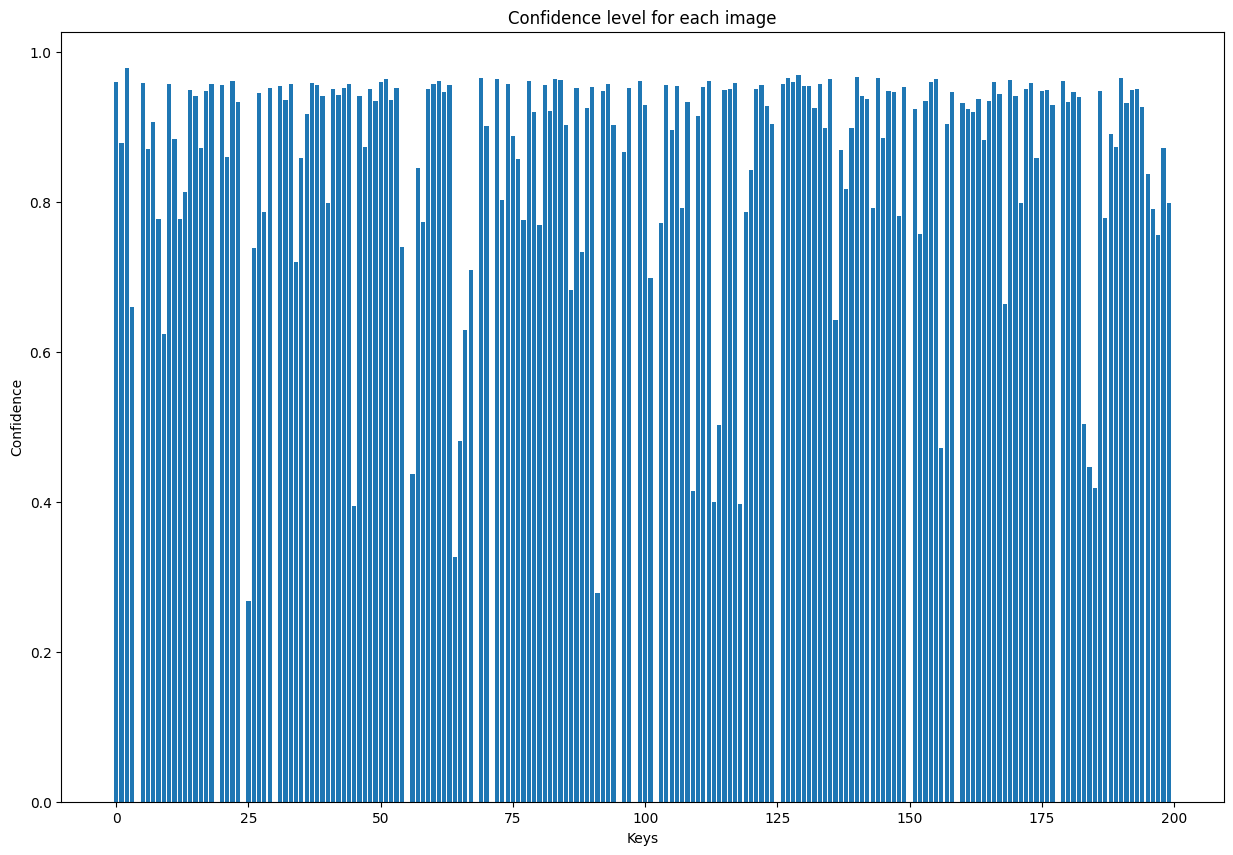

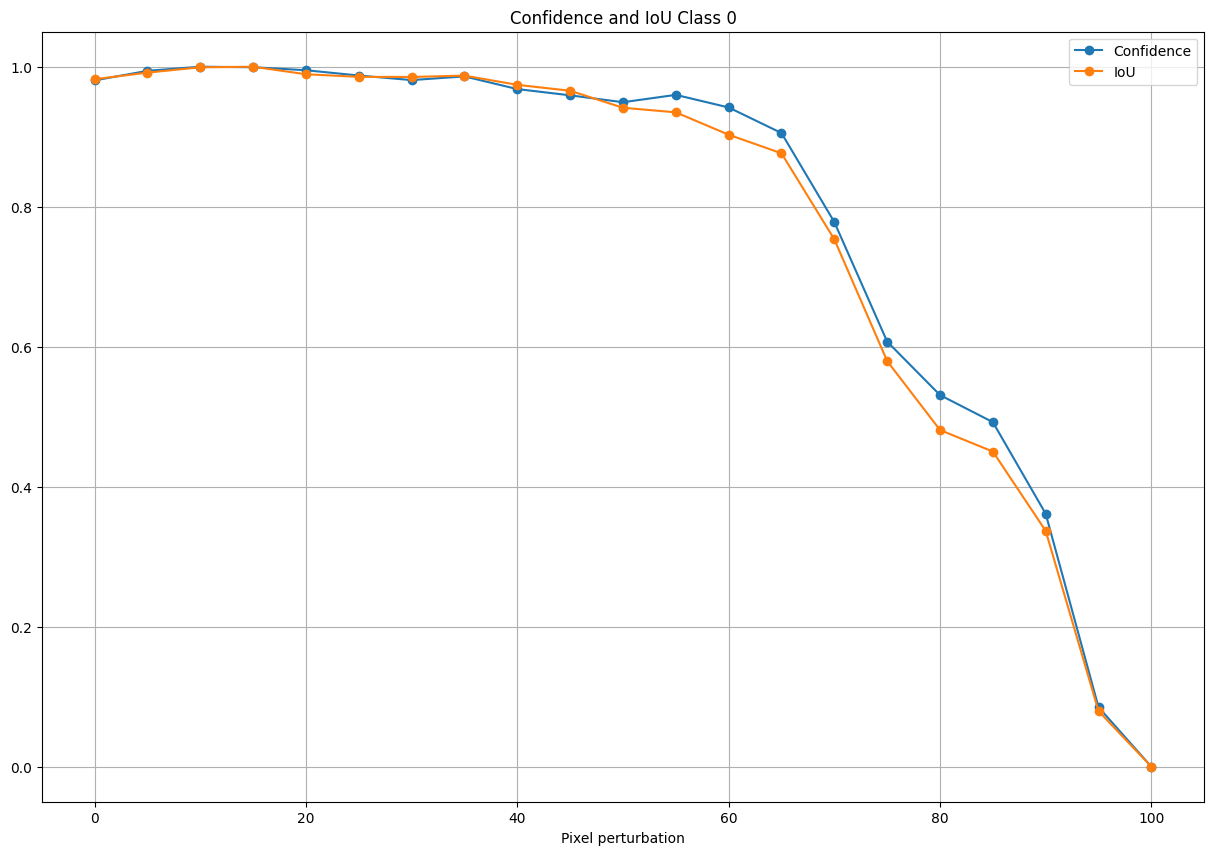

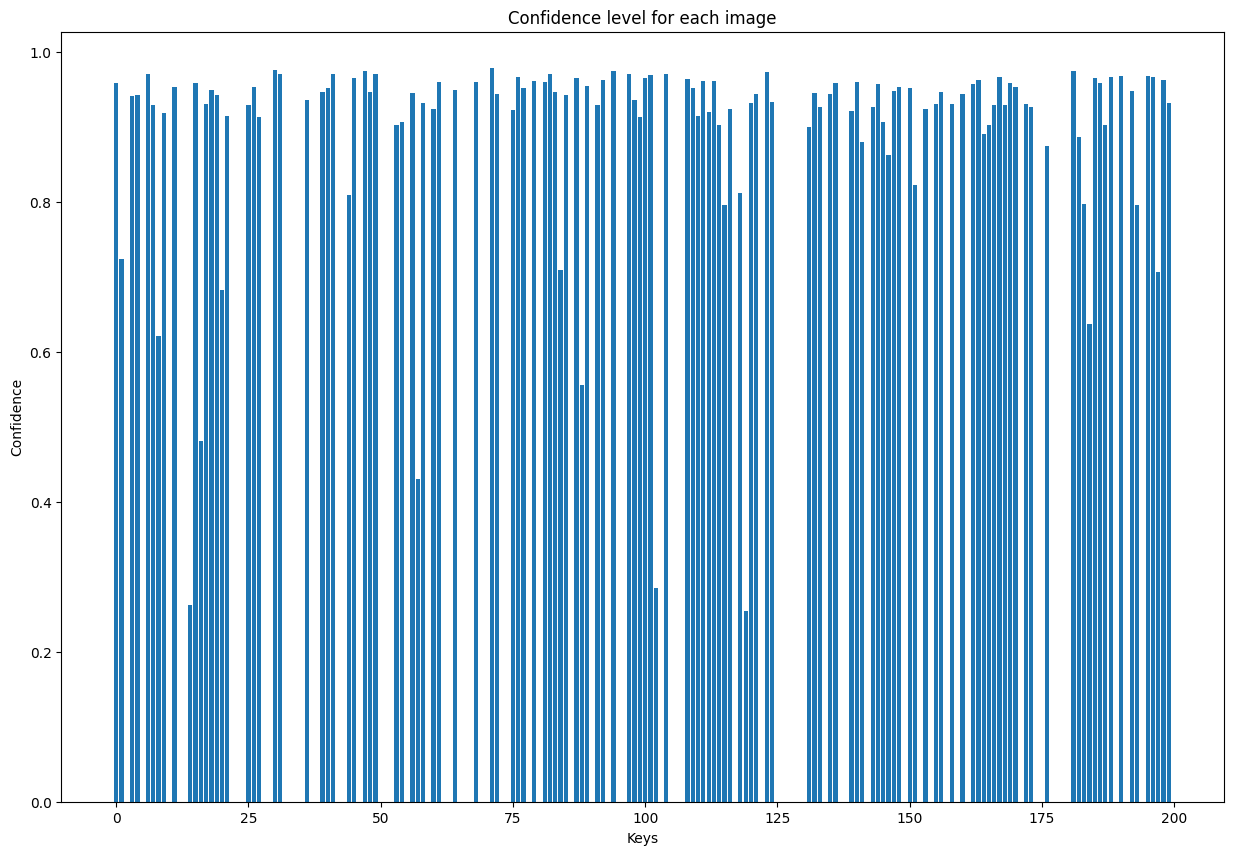

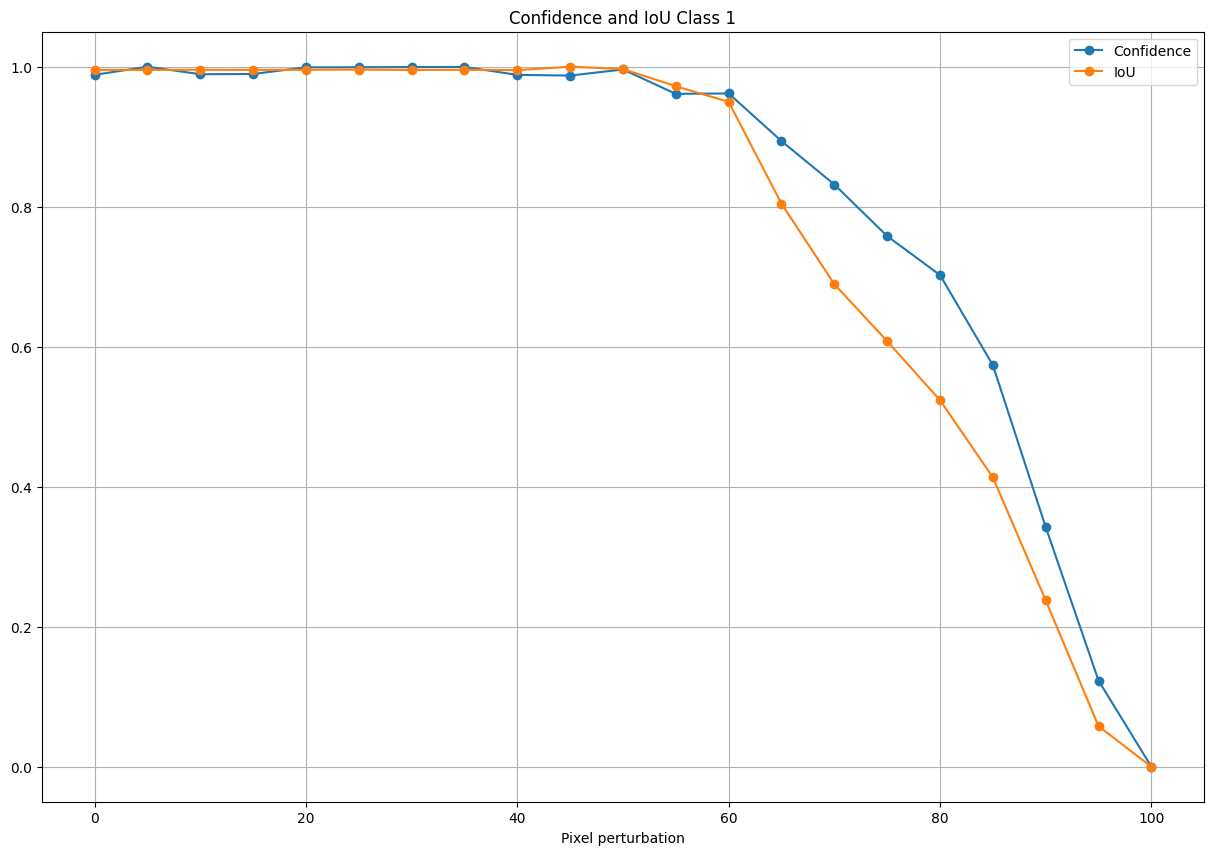

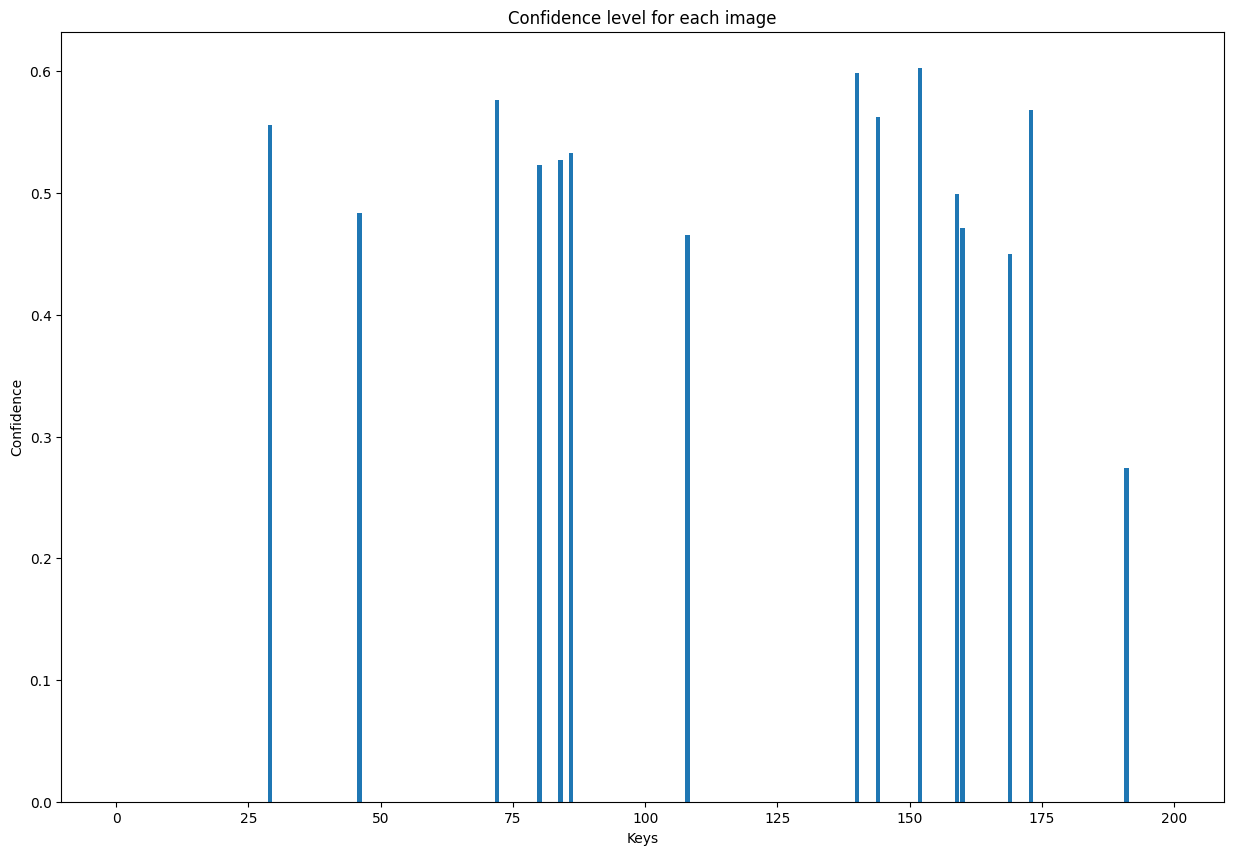

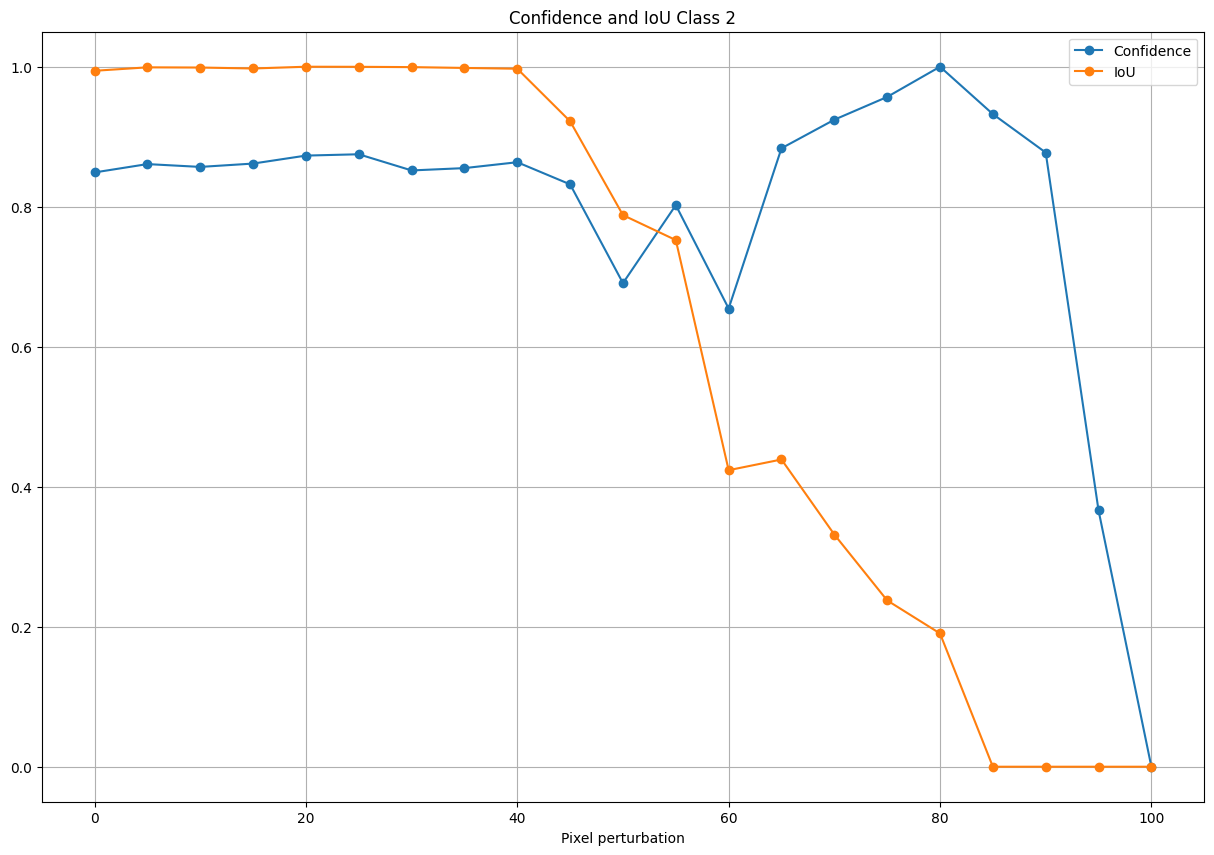

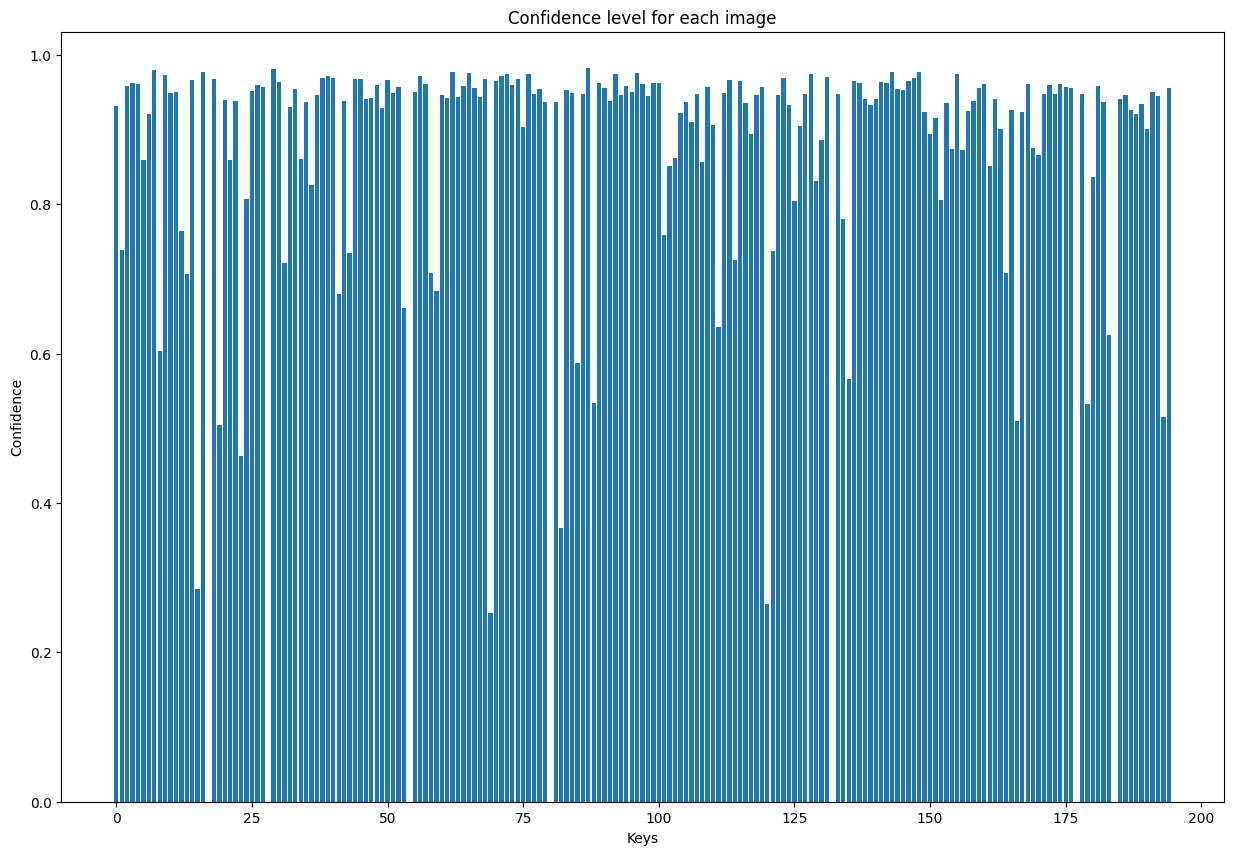

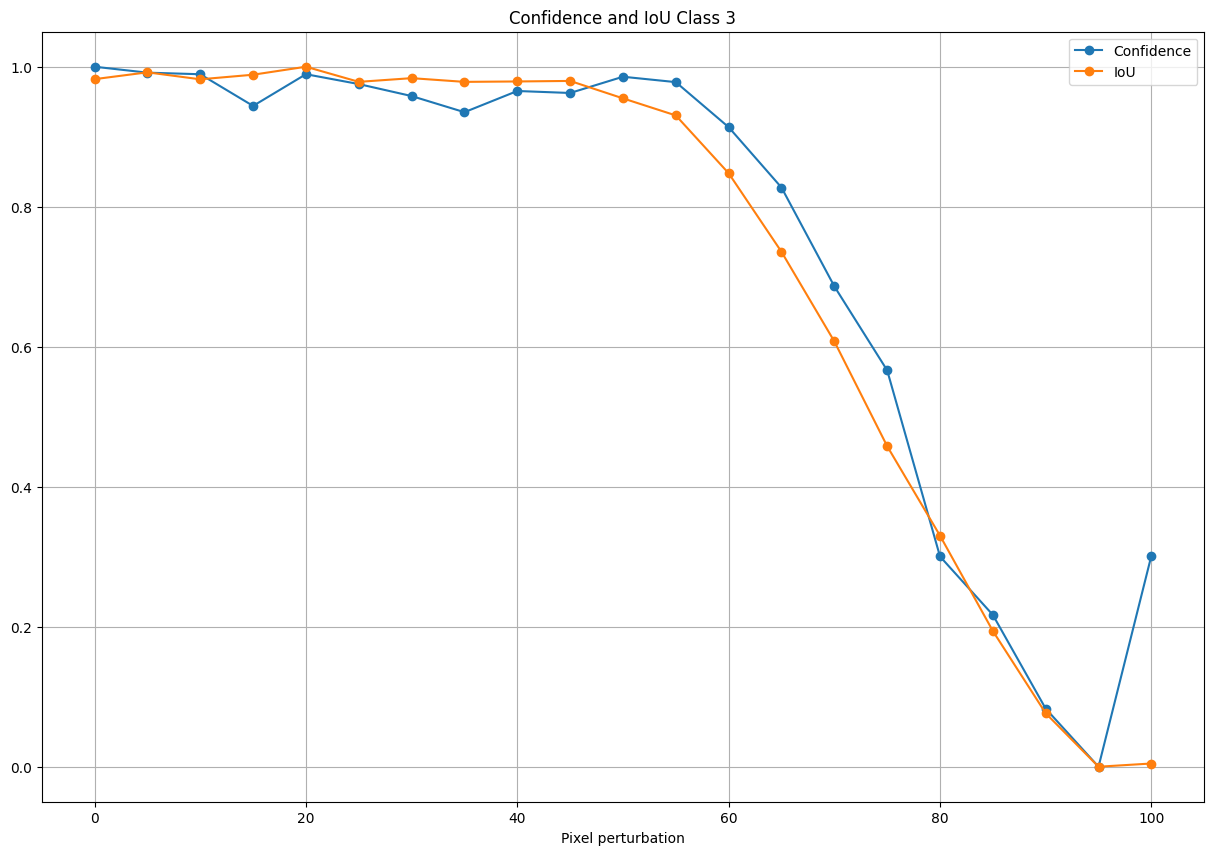

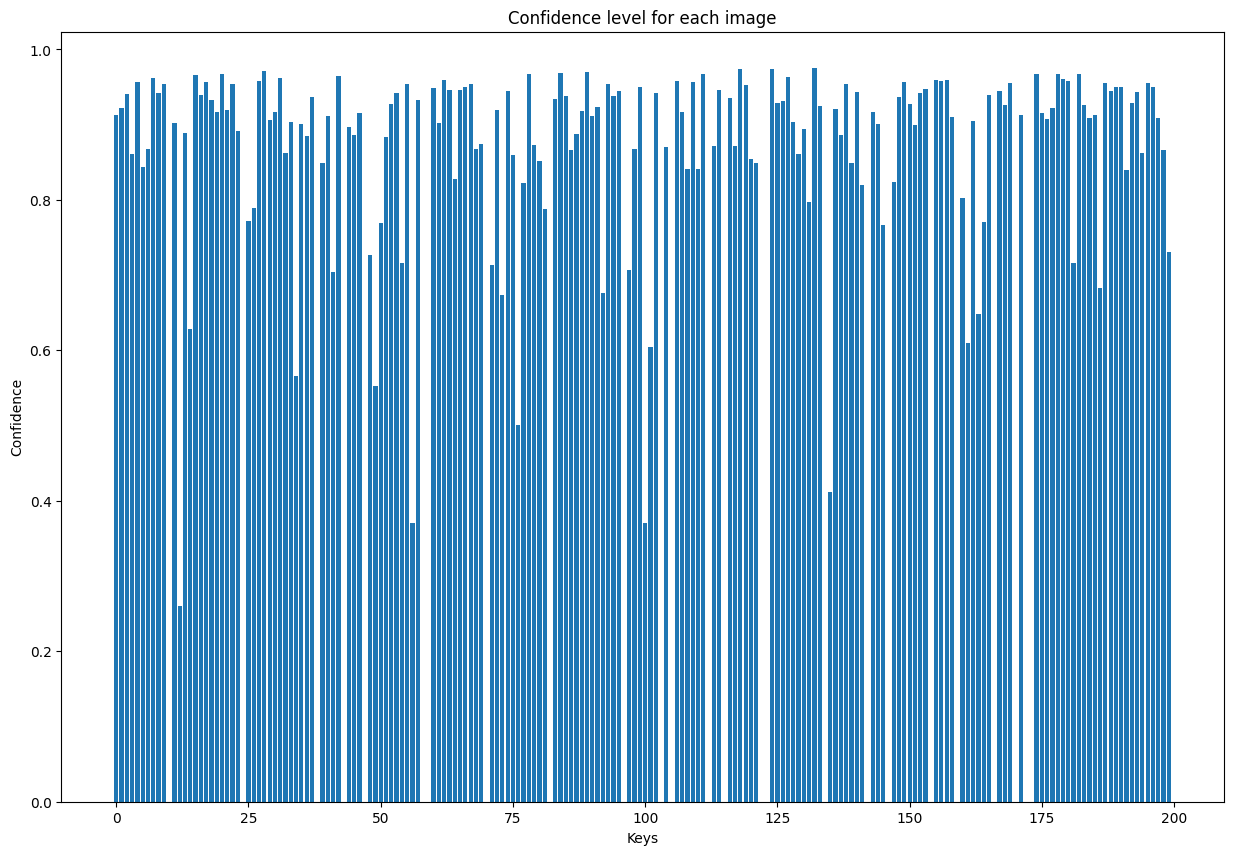

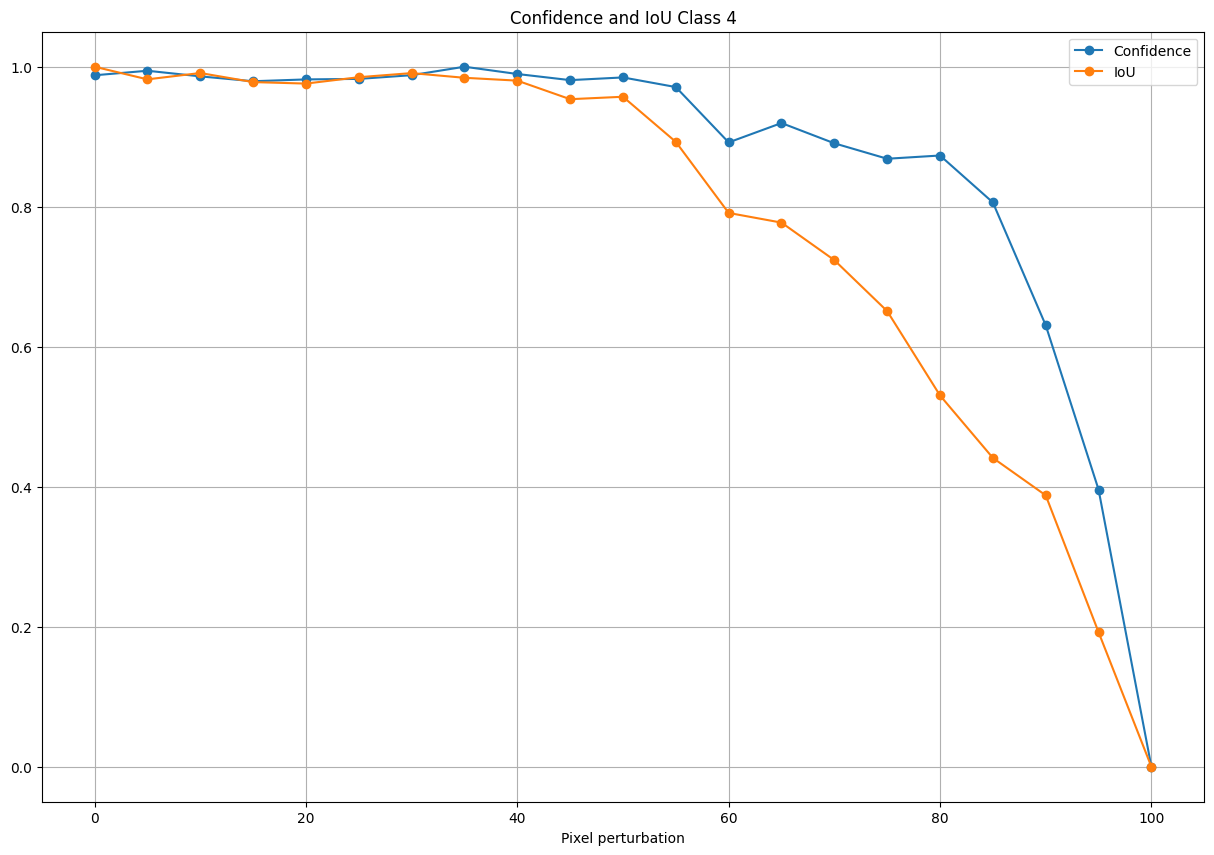

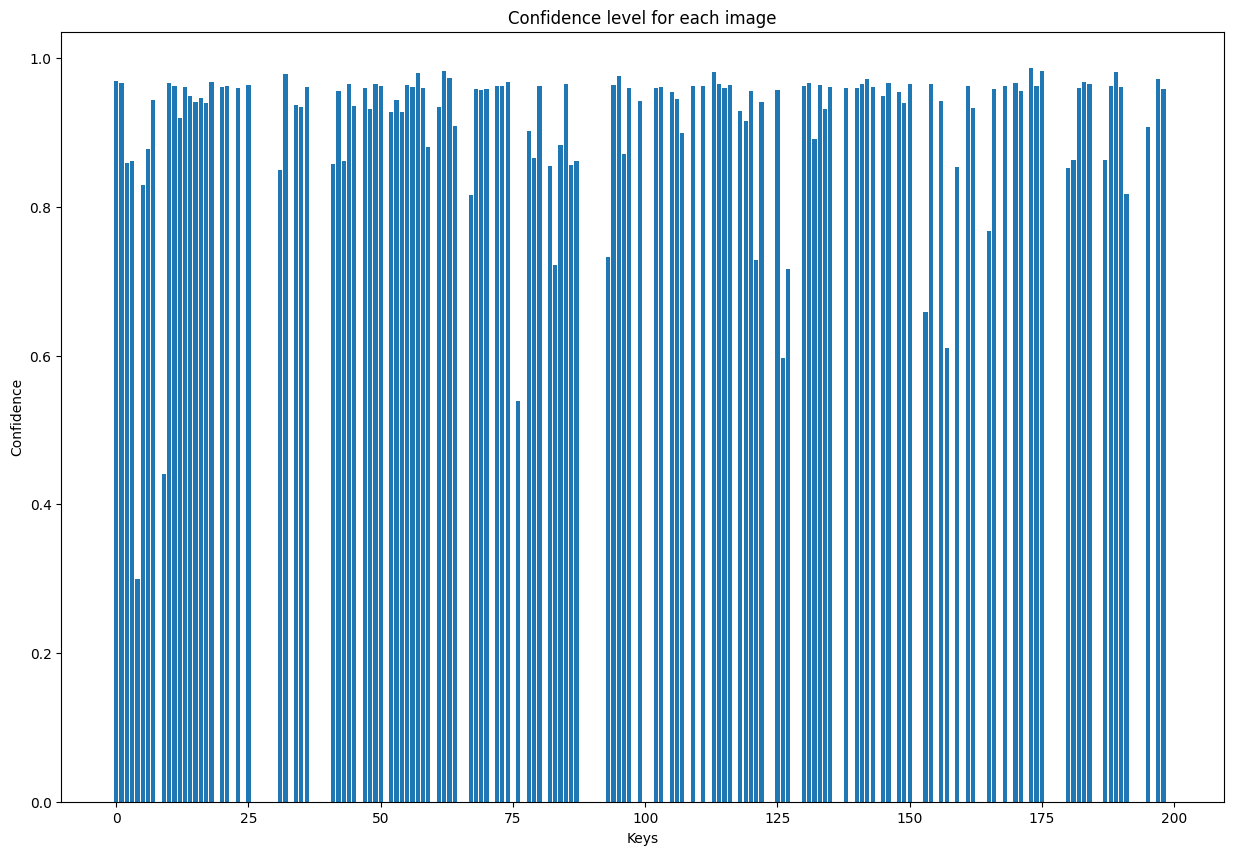

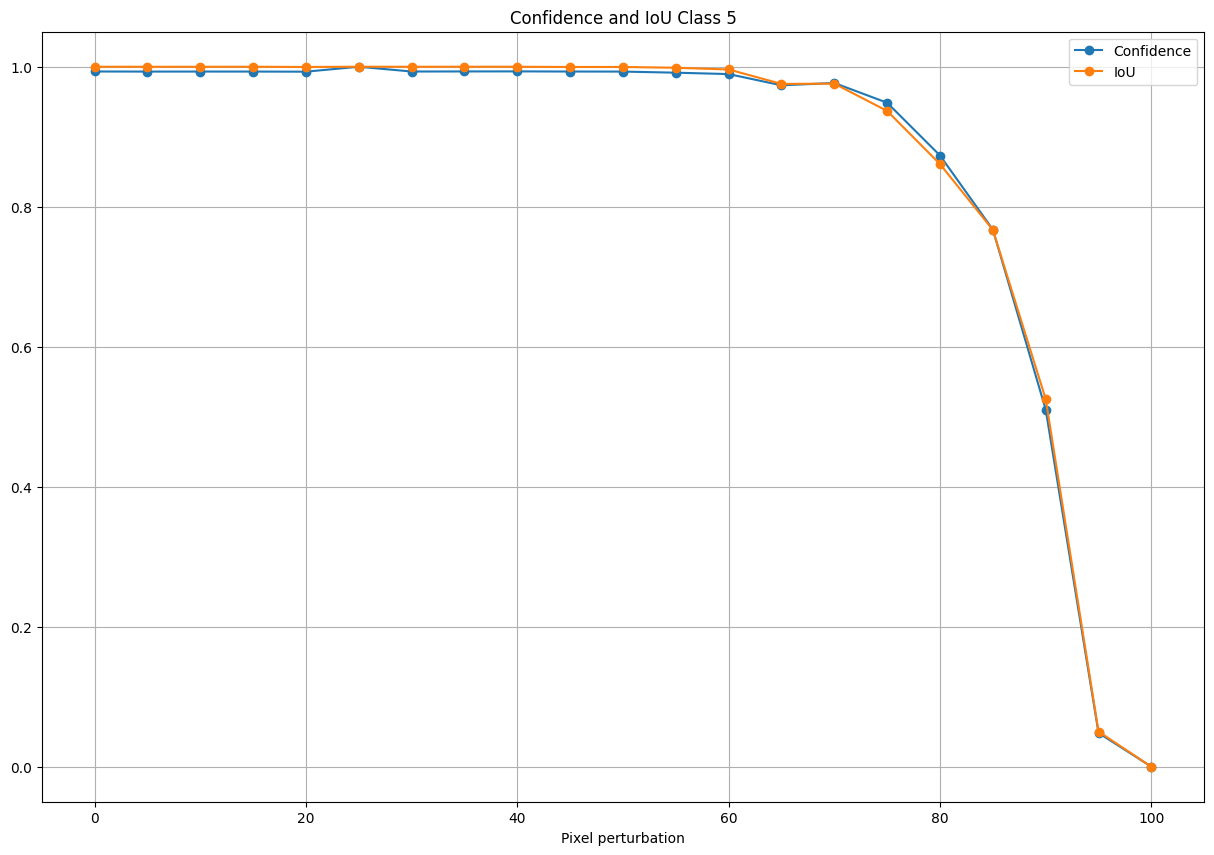

In [13]:
for i in range(6):
    cls = acquire(i)
    plot_dict(cls)
    plot(cls, "Class " + str(i))

In [14]:
def find_min(dict):
    filtered_values = [value for value in dict.values() if value != 0]

    if filtered_values:
        min_value = min(filtered_values)
        min_keys = [key for key, value in dict.items() if value == min_value]
    return min_keys


In [15]:
class_1 = acquire(1)
initial_conf = remove_none(class_1)
find_min(initial_conf)

['20-04-2023_11-11-57_Cam1_173.jpg']

In [16]:
example_inital = initial_conf['20-04-2023_11-11-57_Cam1_173.jpg']

In [17]:
example = class_1["conf_tot"]['20-04-2023_11-11-57_Cam1_173.jpg']

In [18]:
for i in range(len(example)):
    if example[i] == -1:
        example[i] = 0
conf_tot = [x - example_inital for x in example]

Area Over the Perturbation Curve 0.43685517992292133


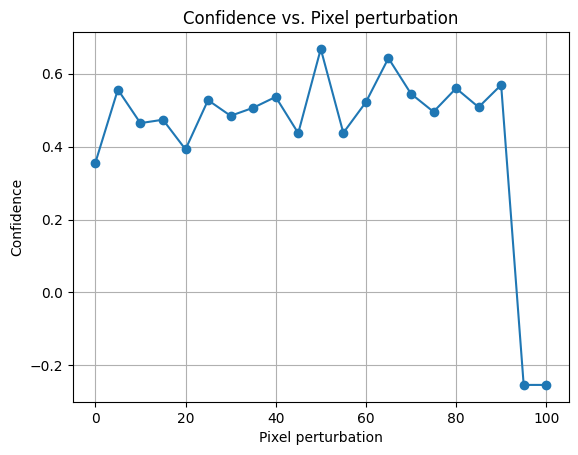

In [19]:
steps = []
for i in range(0, 101, 5):
    steps.append(i)
plt.plot(steps, conf_tot, marker='o', linestyle='-')
print("Area Over the Perturbation Curve",sum(conf_tot) / len(steps))

plt.xlabel('Pixel perturbation')
plt.ylabel('Confidence')
plt.title('Confidence vs. Pixel perturbation')
plt.grid(True) 
plt.show()

Area Over the Perturbation Curve 0.690535945551736


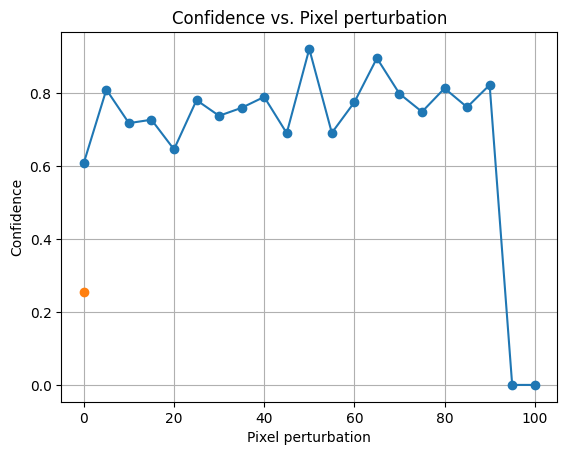

In [20]:
steps = []
for i in range(0, 101, 5):
    steps.append(i)
plt.plot(steps, example, label = "Modified", marker='o', linestyle='-')
plt.plot(example_inital, label = "Baseline", marker='o', linestyle='-')
print("Area Over the Perturbation Curve",sum(example) / len(steps))

plt.xlabel('Pixel perturbation')
plt.ylabel('Confidence')
plt.title('Confidence vs. Pixel perturbation')
plt.grid(True) 
plt.show()